# 2. Î©ãÏßÑ Îã®Ïñ¥Ïû• ÎßåÎì§Í∏∞


https://nbviewer.org/github/eunji1/NLP/blob/main/NLP%5B2%5D_spm.ipynb


In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [80.4 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.launchpad.net/cran/

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Installing automake (A dependency for mecab-ko)
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 5.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0   523k      0  0:00:02  0:00:02 --:--:-- 1049k
./configure: line 7378: /usr/bin/file: No such file or directory
In file included from viterbi.cpp:14:0:
param.h:30:13: warning: 'Target {anonymous}::lexical_cast(Source) [with Target = std::__cxx11::basic_string<char>; Source = std::_

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
train_data = pd.read_table('/gdrive/MyDrive/Colab Notebooks/Going_Deeper(NLP)/Node.02/sp_tokenizer/data/ratings_train.txt')
test_data = pd.read_table('/gdrive/MyDrive/Colab Notebooks/Going_Deeper(NLP)/Node.02/sp_tokenizer/data/ratings_test.txt')

train_data.head()

id                                           document  label
0   9976970                                ÏïÑ ÎçîÎπô.. ÏßÑÏßú ÏßúÏ¶ùÎÇòÎÑ§Ïöî Î™©ÏÜåÎ¶¨      0
1   3819312                  Ìù†...Ìè¨Ïä§ÌÑ∞Î≥¥Í≥† Ï¥àÎî©ÏòÅÌôîÏ§Ñ....Ïò§Î≤ÑÏó∞Í∏∞Ï°∞Ï∞® Í∞ÄÎ≥çÏßÄ ÏïäÍµ¨ÎÇò      1
2  10265843                                  ÎÑàÎ¨¥Ïû¨Î∞ìÏóàÎã§Í∑∏ÎûòÏÑúÎ≥¥ÎäîÍ≤ÉÏùÑÏ∂îÏ≤úÌïúÎã§      0
3   9045019                      ÍµêÎèÑÏÜå Ïù¥ÏïºÍ∏∞Íµ¨Î®º ..ÏÜîÏßÅÌûà Ïû¨ÎØ∏Îäî ÏóÜÎã§..ÌèâÏ†ê Ï°∞Ï†ï      0
4   6483659  ÏÇ¨Ïù¥Î™¨ÌéòÍ∑∏Ïùò ÏùµÏÇ¥Ïä§Îü∞ Ïó∞Í∏∞Í∞Ä ÎèãÎ≥¥ÏòÄÎçò ÏòÅÌôî!Ïä§ÌååÏù¥ÎçîÎß®ÏóêÏÑú ÎäôÏñ¥Î≥¥Ïù¥Í∏∞Îßå ÌñàÎçò Ïª§Ïä§Ìã¥ ...      1

Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú


In [ ]:
# drop_duplicates, Ï§ëÎ≥µ Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
# dropna(how = 'any'), Ìï¥Îãπ ÌñâÏóê nanÍ∞íÏù¥ ÌïúÍ∞úÎùºÎèÑ ÏûàÏùÑ Îïå Ï†úÍ±∞Ìï¥Ï§ÄÎã§.  

train_data.drop_duplicates(subset=['document'], inplace=True) #subsetÏùÄ Ï§ëÎ≥µÎç∞Ïù¥ÌÑ∞Î•º Ï≤òÎ¶¨Ìï† Ïó¥ÏùÑ ÏûÖÎ†•Î∞õÎäîÎã§.
train_data = train_data.dropna(how = 'any') 

test_data.drop_duplicates(subset=['document'], inplace=True)
test_data = test_data.dropna(how = 'any') 

In [ ]:
print("ÌõàÎ†® ÏÉòÌîå Í∞úÏàò: {}, ÌÖåÏä§Ìä∏ Í∞úÏàò: {}".format(len(train_data), len(test_data)))

ÌõàÎ†® ÏÉòÌîå Í∞úÏàò: 146182, ÌÖåÏä§Ìä∏ Í∞úÏàò: 49157


In [ ]:
import re

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò

re.sub(r"[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£ ]","",str(train_data['document'])) 


re.sub(r"[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£ ]","",str(test_data['document'])) 




'                                                      Íµ≥ „Öã                                                        Î≠êÏïº Ïù¥ ÌèâÏ†êÎì§ÏùÄ ÎÇòÏÅòÏßÑ ÏïäÏßÄÎßå Ï†ê ÏßúÎ¶¨Îäî ÎçîÎçîÏö± ÏïÑÎãàÏûñÏïÑ                         ÏßÄÎ£®ÌïòÏßÄÎäî ÏïäÏùÄÎç∞ ÏôÑÏ†Ñ ÎßâÏû•ÏûÑ ÎèàÏ£ºÍ≥† Î≥¥Í∏∞ÏóêÎäî        Îßå ÏïÑÎãàÏóàÏñ¥ÎèÑ Î≥Ñ Îã§ÏÑØ Í∞ú Ï§¨ÏùÑÌÖêÎç∞ Ïôú Î°ú ÎÇòÏôÄÏÑú Ï†ú Ïã¨Í∏∞Î•º Î∂àÌé∏ÌïòÍ≤å ÌïòÏ£†                                                                   Ïò§ÎûúÎßåÏóê ÌèâÏ†ê Î°úÍ∏¥ÌñàÎÑ§„Öã„Öã ÌÇπÏôïÏß± ÏåàÎΩïÌïú ÏòÅÌôîÎ•º ÎßåÎÇ¨ÏäµÎãàÎã§ Í∞ïÎ†¨ÌïòÍ≤å Ïú°ÏæåÌï®         ÏùòÏßÄ Î∞ïÏïΩÎì§Ïù¥ÎÇò ÌïòÎäîÍ±∞Îã§ ÌÉàÏòÅÏùÄ ÏùºÎã® Ï£ºÏù∏Í≥µ ÍπÄÎåÄÌù¨ ÎãÆÏïòÍ≥† Ïù¥Îì±Î≥ë Ï∞êÎî∞                    Í∑∏Î¶ºÎèÑ Ï¢ãÍ≥† ÏôÑÏÑ±ÎèÑÎèÑ ÎÜíÏïòÏßÄÎßå Î≥¥Îäî ÎÇ¥ÎÇ¥ Î∂àÏïàÌïòÍ≤å ÎßåÎì†Îã§       Ï†àÎåÄ Î¥êÏÑúÎäî Ïïà Îê† ÏòÅÌôî Ïû¨ÎØ∏ÎèÑ ÏóÜÍ≥† Í∏∞Î∂ÑÎßå Ïû°ÏπòÍ≥† Ìïú ÏÑ∏Ìä∏Ïû•ÏóêÏÑú Îã§ Ìï¥Î®πÎÑ§                                           ÎßàÎ¨¥Î¶¨Îäî Îòê ÏôúÏù¥Îûò     '

In [ ]:
print(len(train_data))
print(len(test_data))

146182
49157


Î¨∏Ïû•Ïùò ÏµúÎã® Í∏∏Ïù¥: 1
Î¨∏Ïû•Ïùò ÏµúÏû• Í∏∏Ïù¥: 146
Î¨∏Ïû•Ïùò ÌèâÍ∑† Í∏∏Ïù¥: 35


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


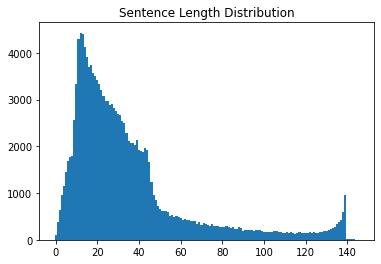

In [ ]:
import matplotlib.pyplot as plt

min_len = 999
max_len = 0
sum_len = 0

for sen in train_data['document']:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("Î¨∏Ïû•Ïùò ÏµúÎã® Í∏∏Ïù¥:", min_len)
print("Î¨∏Ïû•Ïùò ÏµúÏû• Í∏∏Ïù¥:", max_len)
print("Î¨∏Ïû•Ïùò ÌèâÍ∑† Í∏∏Ïù¥:", sum_len // len(train_data))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in train_data['document']:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


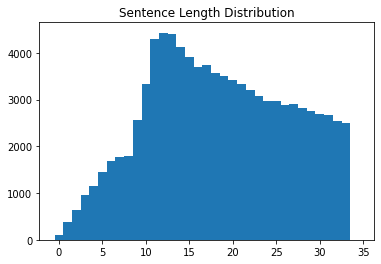

In [ ]:
max_len = 35

# Í∏∏Ïù¥ Ï°∞Í±¥Ïóê ÎßûÎäî Î¨∏Ïû•Îßå ÏÑ†ÌÉùÌï©ÎãàÎã§.
filtered_corpus = [s for s in train_data['document'] if (len(s) < max_len)]
#ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÎèÑ
filtered_corpus_t = [s for s in test_data['document'] if (len(s) < max_len)]

# Î∂ÑÌè¨ÎèÑÎ•º Îã§Ïãú Í∑∏Î†§Î¥ÖÎãàÎã§.
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

2-3. Í≥µÎ∞± Í∏∞Î∞ò ÌÜ†ÌÅ∞Ìôî

In [ ]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib as plt
import konlpy

print(tf.__version__)
print(np.__version__)
print(plt.__version__)
print(konlpy.__version__)

2.8.0
1.21.5
3.2.2
0.6.0


In [ ]:
!pip install sentencepiece

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.2 MB 4.3 MB/s 


In [ ]:
import sentencepiece as spm

vocab_size = 32000
stopwords = ['Ïùò','Í∞Ä','Ïù¥','ÏùÄ','Îì§','Îäî','Ï¢Ä','Ïûò','Í±ç','Í≥º','ÎèÑ','Î•º','ÏúºÎ°ú','Ïûê','Ïóê','ÏôÄ','Ìïú','ÌïòÎã§','.'] #.Ï∂îÍ∞Ä


def load_data(train_data, test_data, num_words=32000):
    #Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨  Ï§ëÎ≥µÏ†úÍ±∞ -> Í≤∞Ï∏°Ïπò Ï†úÍ±∞ (train , test )
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any') 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 
    
    # Ï†ïÍ∑úÌëúÌòÑÏãù Ï†ÅÏö© (ÌïúÍ∏Ä, Í≥µÎ∞±, !, ? Ï†úÏô∏ Ï†úÍ±∞)
    train_data['document'] = train_data['document'].str.replace('[^ „Ñ±-„Ö£ Í∞Ä-Ìû£ ! ?]','')
    test_data['document'] = test_data['document'].str.replace('[^ „Ñ±-„Ö£ Í∞Ä-Ìû£ ! ?]','')

    # Í≥µÎ∞±, !, ? Í∏∞Ìò∏Í∞Ä Î∞òÎ≥µÎê† Í≤ΩÏö∞ Ìïú Í∞úÎ°ú Ï∂ïÏïΩ
    train_data['document'] = train_data['document'].str.replace(' +', ' ')
    test_data['document'] = test_data['document'].str.replace(' +', ' ')
    
    train_data['document'] = train_data['document'].str.replace('\?+', '?')
    test_data['document'] = test_data['document'].str.replace('\?+', '?')

    train_data['document'] = train_data['document'].str.replace('!+', '!')
    test_data['document'] = test_data['document'].str.replace('!+', '!')

    y_train =  np.array(list(train_data['label'])) 
    y_test = np.array(list(test_data['label']))
    
    return train_data['document'], test_data['document'], y_train, y_test

train_data, test_data, y_train, y_test = load_data(train_data, test_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The default value of regex will change from True to Fals

In [ ]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [ ]:
import sentencepiece as spm
import os
#temp_file = ('/gdrive/My Drive/Colab Notebooks/Going Deeper(NLP)/Node.02/sp_tokenizer/data/korean-english-park.train.ko.temp')
temp_file = ('/gdrive/MyDrive/data/korean-english-park.train.ko.temp')
vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # Ïù¥Ï†Ñ Ïä§ÌÖùÏóêÏÑú Ï†ïÏ†úÌñàÎçò corpusÎ•º ÌôúÏö©Ìï©ÎãàÎã§.
        f.write(str(row) + '\n')
    
spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)
)
#ÏúÑ TrainÏóêÏÑú  --model_type = 'unigram'Ïù¥ ÎîîÌè¥Ìä∏ Ï†ÅÏö©ÎêòÏñ¥ ÏûàÏäµÎãàÎã§. --model_type = 'bpe' Î°ú ÏòµÏÖòÏùÑ Ï£ºÏñ¥ Î≥ÄÍ≤ΩÌï† Ïàò ÏûàÏäµÎãàÎã§.

!ls -l korean_spm*

-rw-r--r-- 1 root root 375949 Mar 24 10:25 korean_spm.model
-rw-r--r-- 1 root root 145415 Mar 24 10:25 korean_spm.vocab


In [ ]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePieceÎ•º ÌôúÏö©Ìïú sentence -> encoding
tokensIDs = s.EncodeAsIds(row)
print(tokensIDs)

# SentencePieceÎ•º ÌôúÏö©Ìïú sentence -> encoded pieces
print(s.SampleEncodeAsPieces(row,1, 0.0))

# SentencePieceÎ•º ÌôúÏö©Ìïú encoding -> sentence Î≥µÏõê
print(s.DecodeIds(tokensIDs))

[268, 6, 3251, 31, 76, 392, 86, 458, 4942, 6]
['‚ñÅÌïúÍµ≠', '‚ñÅÏòÅÌôî', '‚ñÅÏµúÏ¥à', 'Î°ú', '‚ñÅÏàò', 'Í∞Ñ', 'ÌïòÎäî', '‚ñÅÎÇ¥Ïö©Ïù¥', '‚ñÅÎã¥Í∏¥', '‚ñÅÏòÅÌôî']
ÌïúÍµ≠ ÏòÅÌôî ÏµúÏ¥àÎ°ú ÏàòÍ∞ÑÌïòÎäî ÎÇ¥Ïö©Ïù¥ Îã¥Í∏¥ ÏòÅÌôî


In [ ]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='pre')

    return tensor, word_index, index_word

In [ ]:
X_train, index_word_train, index_word_train = sp_tokenize(s, train_data)

In [ ]:
X_test, index_word_test, index_word_test = sp_tokenize(s, test_data)

In [ ]:
y_train[:5]

array([0, 1, 0, 0, 1])

In [ ]:
y_test[:5]

array([1, 0, 0, 0, 0])

In [ ]:
train_data[:5]

0                                    ÏïÑ ÎçîÎπô ÏßÑÏßú ÏßúÏ¶ùÎÇòÎÑ§Ïöî Î™©ÏÜåÎ¶¨
1                           Ìù†Ìè¨Ïä§ÌÑ∞Î≥¥Í≥† Ï¥àÎî©ÏòÅÌôîÏ§ÑÏò§Î≤ÑÏó∞Í∏∞Ï°∞Ï∞® Í∞ÄÎ≥çÏßÄ ÏïäÍµ¨ÎÇò
2                                    ÎÑàÎ¨¥Ïû¨Î∞ìÏóàÎã§Í∑∏ÎûòÏÑúÎ≥¥ÎäîÍ≤ÉÏùÑÏ∂îÏ≤úÌïúÎã§
3                            ÍµêÎèÑÏÜå Ïù¥ÏïºÍ∏∞Íµ¨Î®º ÏÜîÏßÅÌûà Ïû¨ÎØ∏Îäî ÏóÜÎã§ÌèâÏ†ê Ï°∞Ï†ï
4    ÏÇ¨Ïù¥Î™¨ÌéòÍ∑∏Ïùò ÏùµÏÇ¥Ïä§Îü∞ Ïó∞Í∏∞Í∞Ä ÎèãÎ≥¥ÏòÄÎçò ÏòÅÌôî!Ïä§ÌååÏù¥ÎçîÎß®ÏóêÏÑú ÎäôÏñ¥Î≥¥Ïù¥Í∏∞Îßå ÌñàÎçò Ïª§Ïä§Ìã¥ ...
Name: document, dtype: object

In [ ]:
my_corpus = train_data[:5]
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0   42  910
    27 1991   70 2526]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0 1151 4712  186 1143   29  253  160  551  397
  1504 6135  451  324]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0   22  464 7427  328 5314
   634 2376 1384  315]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0 2076   12  203  162 3907  339
   897   90  614 5879]
 [3260 3319 1807  224    9    3 2141  418 2750  519 2949  120 2479    6
    18 6349   61 6982 1632 1170 3280 2034   62 1949    3  142  785   10
  2410 3611  120  700]]


In [ ]:
print(len(X_train))
print(len(X_test))

146182
49157


In [ ]:
X_val = X_train[:50000]
X_train = X_train[50000:]

y_val = y_train[:50000]
y_train = y_train[50000:]

In [ ]:
print(len(X_val), len(X_train))

50000 96182


Î™®Îç∏ ÌïôÏäµÌïòÍ∏∞

In [ ]:
vocab_size = 50000 
word_vector_dim = 16 # ÏõåÎìú Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏàò (Î≥ÄÍ≤ΩÍ∞ÄÎä•Ìïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞)

In [ ]:
# LSTM
model = tf.keras.Sequential(name='LSTM')
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(8))   # Í∞ÄÏû• ÎÑêÎ¶¨ Ïì∞Ïù¥Îäî RNNÏù∏ LSTM Î†àÏù¥Ïñ¥Î•º ÏÇ¨Ïö©ÌïòÏòÄÏäµÎãàÎã§. Ïù¥Îïå LSTM state Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏàòÎäî 8Î°ú ÌïòÏòÄÏäµÎãàÎã§. (Î≥ÄÍ≤Ω Í∞ÄÎä•)
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # ÏµúÏ¢Ö Ï∂úÎ†•ÏùÄ Í∏çÏ†ï/Î∂ÄÏ†ïÏùÑ ÎÇòÌÉÄÎÇ¥Îäî 1dim ÏûÖÎãàÎã§.

model.summary()
#Îã®Ïñ¥ÌïòÎÇòÎßàÎã§ Ïó∞ÏÜçÏÑ±Ïù¥ ÏóÜÏñ¥ÏÑú noneÏùÑ Ïì¥Îã§.


Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          800000    
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 800,881
Trainable params: 800,881
Non-trainable params: 0
_________________________________________________________________


Î™®Îç∏ÌõàÎ†® Í∞úÏãú

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=10  # Î™á epochÎ•º ÌõàÎ†®ÌïòÎ©¥ Ï¢ãÏùÑÏßÄ Í≤∞Í≥ºÎ•º Î≥¥Î©¥ÏÑú Î∞îÍæ∏Ïñ¥ Î¥ÖÏãúÎã§. 

history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/10
752/752 [==============================] - 12s 12ms/step - loss: 0.4448 - accuracy: 0.7953 - val_loss: 0.3601 - val_accuracy: 0.8437
Epoch 2/10
752/752 [==============================] - 8s 11ms/step - loss: 0.3371 - accuracy: 0.8564 - val_loss: 0.3535 - val_accuracy: 0.8454
Epoch 3/10
752/752 [==============================] - 8s 11ms/step - loss: 0.3119 - accuracy: 0.8677 - val_loss: 0.3504 - val_accuracy: 0.8476
Epoch 4/10
752/752 [==============================] - 8s 11ms/step - loss: 0.2889 - accuracy: 0.8771 - val_loss: 0.3503 - val_accuracy: 0.8483
Epoch 5/10
752/752 [==============================] - 8s 11ms/step - loss: 0.2675 - accuracy: 0.8875 - val_loss: 0.3590 - val_accuracy: 0.8460
Epoch 6/10
752/752 [==============================] - 8s 11ms/step - loss: 0.2474 - accuracy: 0.8955 - val_loss: 0.3742 - val_accuracy: 0.8439
Epoch 7/10
752/752 [==============================] - 8s 11ms/step - loss: 0.2300 - accuracy: 0.9036 - val_loss: 0.3897 - val_accuracy: 0.842

Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict.keys()) # epochÏóê Îî∞Î•∏ Í∑∏ÎûòÌîÑÎ•º Í∑∏Î†§Î≥º Ïàò ÏûàÎäî Ìï≠Î™©Îì§

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


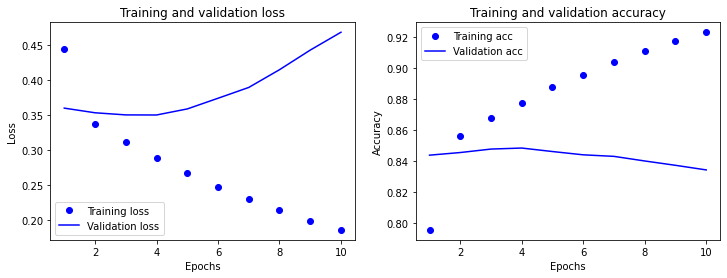

In [ ]:
# LSTM Í∑∏ÎûòÌîÑ

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss') # "bo"Îäî "ÌååÎûÄÏÉâ Ï†ê"ÏûÖÎãàÎã§
plt.plot(epochs, val_loss, 'b', label='Validation loss') # bÎäî "ÌååÎûÄ Ïã§ÏÑ†"ÏûÖÎãàÎã§
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Î£®Î∏åÎ¶≠

ÏïÑÎûòÏùò Í∏∞Ï§ÄÏùÑ Î∞îÌÉïÏúºÎ°ú ÌîÑÎ°úÏ†ùÌä∏Î•º ÌèâÍ∞ÄÌï©ÎãàÎã§.

|ÌèâÍ∞ÄÎ¨∏Ìï≠|ÏÉÅÏÑ∏Í∏∞Ï§Ä|
|:---|:---|
|1. SentencePieceÎ•º Ïù¥Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ ÎßåÎì§Í∏∞ÍπåÏßÄÏùò Í≥ºÏ†ïÏù¥ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú ÏßÑÌñâÎêòÏóàÎäîÍ∞Ä?|ÏΩîÌçºÏä§ Î∂ÑÏÑù, Ï†ÑÏ≤òÎ¶¨, SentencePiece Ï†ÅÏö©, ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Íµ¨ÌòÑ Î∞è ÎèôÏûëÏù¥ Îπ†ÏßêÏóÜÏù¥ ÏßÑÌñâÎêòÏóàÎäîÍ∞Ä?|
|2. SentencePieceÎ•º ÌÜµÌï¥ ÎßåÎì† TokenizerÍ∞Ä ÏûêÏó∞Ïñ¥Ï≤òÎ¶¨ Î™®Îç∏Í≥º Í≤∞Ìï©ÌïòÏó¨ ÎèôÏûëÌïòÎäîÍ∞Ä?|SentencePiece ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÍ∞Ä Ï†ÅÏö©Îêú Text Classifier Î™®Îç∏Ïù¥ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú ÏàòÎ†¥ÌïòÏó¨ 80% Ïù¥ÏÉÅÏùò test accuracyÍ∞Ä ÌôïÏù∏ÎêòÏóàÎã§.|
|3. SentencePieceÏùò ÏÑ±Îä•ÏùÑ Îã§Í∞ÅÎèÑÎ°ú ÎπÑÍµêÎ∂ÑÏÑùÌïòÏòÄÎäîÍ∞Ä?|SentencePiece ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ•º ÌôúÏö©ÌñàÏùÑ ÎïåÏùò ÏÑ±Îä•ÏùÑ Îã§Î•∏ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä ÌòπÏùÄ SentencePieceÏùò Îã§Î•∏ ÏòµÏÖòÏùò Í≤ΩÏö∞ÏôÄ ÎπÑÍµêÌïòÏó¨ Î∂ÑÏÑùÏùÑ Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú ÏßÑÌñâÌïòÏòÄÎã§.|



Í≥†ÏûâÎîîÌçº ÏóîÏóòÌîº Ï≤´ ÌîÑÎ°úÏ†ùÌä∏Îäî ÎÑàÎ¨¥ Ïñ¥Î†§ÏõåÏÑú Ïò§ÎûúÏãúÍ∞ÑÏùÑ Î≥¥ÏïòÏóàÎã§. ÏΩîÎìúÎ•º ÎÇ¥ÎßòÎåÄÎ°ú Î≥ÄÌòïÌï¥ÏÑú Ïì∞Î†§Îã§Î≥¥Îãà Ïã§Î†•Ïù¥ ÎÑàÎ¨¥ÎÇò Î∂ÄÏ°±ÌïòÍ≥† Ïâ¨Ïö¥Í≤å ÏóÜÎã® Í≤ÉÏùÑ ÎäêÍºàÎã§.„Ö†„Ö†„Ö† Í≥µÎ∂ÄÎ•º Îçî Ïó¥Ïã¨Ìûà Ìï¥ÏïºÍ≤†Îã§.

Î¨∏Ï†úÏöîÏù∏
1. ÏΩîÎû©ÏúºÎ°ú txtÌååÏùºÏùÑ Î∂àÎü¨Ïò¨Îïå Ìï≠ÏÉÅ ÏûòÎêòÎçòÍ≤å Ïò§Î•òÍ∞Ä ÎÇ¨Îã§. Ïù¥Í≤ÉÏùÄ ÎìúÎùºÏù¥Î∏å Î∂àÎü¨Ïò§Îäî Í≤ΩÎ°úÍ∞Ä ```/My Drive/Colab Notebooks``` Ïù¥ÏôÄÍ∞ôÏù¥ ÌååÏùºÎ™ÖÏóê Í≥µÎ∞± Ï≤òÎ¶¨Í∞Ä ÎêòÏñ¥ÏûàÏùÑ Í≤ΩÏö∞ ÏóêÎü¨Í∞Ä ÎÇòÎäî Í≤É Í∞ôÎã§.
2. Î™®Îç∏ ÌïôÏäµÌïòÍ∏∞ ÏúÑÌï¥ÏÑú x_trainÍ≥º y_train Î∞∞Ïó¥ÏùÑ ÎßûÏ∂∞ÏïºÌïòÏßÄÎßå ÎÇ¥Í∞Ä Ï∞æÏùÄ ÏΩîÎìúÎ°úÎäî Ï†ÑÌòÄ ÎêòÏßÄ ÏïäÏïòÎã§. ÎèôÏÑ≠Îãò ÏΩîÎìúÎ•º Î≥¥Í≥† ÎßûÏ∂∞ÏÑú ÌñàÎã§.üòÑ

ÏÉàÎ°≠Í≤å ÏïåÍ≤åÎêú ÏÇ¨Ïã§
- Ìå®Îî©ÏùÑ Ìï† Îïå 'pre', 'post' Îëò Ï§ë ÌïòÎÇòÎ•º ÏÇ¨Ïö©ÌïòÎäîÎç∞, preÎäî ÏïûÏóêÏÑúÎ∂ÄÌÑ∞ 0ÏùÑ Ï±ÑÏö∞Îäî Í≤É, postÎäî Îí§ÏóêÏÑúÎ∂ÄÌÑ∞ 0ÏùÑ Ï±ÑÏö∞Îäî Í≤ÉÏù¥Îã§.
- postÎ°ú ÌñàÏùÑ ÎïåÎäî Ï†ïÌôïÎèÑÍ∞Ä 0.5Î°ú ÎÇòÏôîÎçò Î∞òÎ©¥Ïóê preÎ°ú ÌñàÏùÑ ÎïåÎäî 0.9 ÎÜíÍ≤å ÎÇòÏôîÎã§. postÎ≥¥Îã§Îäî preÍ∞Ä Ï†ïÌôïÎèÑÍ∞Ä ÎÜíÍ≤å ÎÇòÏò®Îã§.(Ïù¥Í≤ÉÎèÑ ÎèôÏÑ≠ÎãòÏù¥ ÏïåÎ†§ÏÖ®Îã§.)
- ÌïúÍµ≠Ïñ¥Îäî Ïñ¥Ïàú ÏÉÅ ÏòÅÏñ¥ÏôÄ Îã¨ÎùºÏÑú preÍ∞Ä Îçî ÏûòÎÇòÏò§ÎäîÍ≤å ÏïÑÎãåÍ∞ÄÏã∂Îã§.